In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
data= pd.read_csv('train.csv')
data_test =pd.read_csv('test.csv')

In [3]:
print data.shape
print data_test.shape

(891, 12)
(418, 11)


In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [5]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
data['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [7]:
data['Sex'].describe()

count      891
unique       2
top       male
freq       577
Name: Sex, dtype: object

In [173]:
data['Age']=data['Age'].fillna(data['Age'].median())
data['Embarked']=data['Embarked'].fillna(data['Embarked'].dropna().mode()) # Replace missing values with most common port

In [9]:
data.columns.tolist()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [156]:
data_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [157]:
data_test['Embarked'].describe()

count     418
unique      3
top         S
freq      270
Name: Embarked, dtype: object

In [174]:
data_test["Fare"] = data_test["Fare"].fillna(data_test["Fare"].median())
data_test["Age"] =data_test["Age"].fillna(data_test["Age"].median())

In [175]:
train_feature= data[["Pclass", "Sex", "Age", "Fare", "SibSp", "Parch","Embarked"]]
test_feature= data_test[["Pclass", "Sex", "Age", "Fare", "SibSp", "Parch","Embarked"]]

In [49]:
target=data['Survived'].values

In [50]:
target.shape

(891L,)

In [176]:
train_feature=pd.get_dummies(train_feature)
test_feature=pd.get_dummies(test_feature)

In [13]:
train_feature.head()

,Pclass,Age,Fare,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22,7.2500,1,0,0,1,0,0,1
1,1,38,71.2833,1,0,1,0,1,0,0
2,3,26,7.9250,0,0,1,0,0,0,1
3,1,35,53.1000,1,0,1,0,0,0,1
4,3,35,8.0500,0,0,0,1,0,0,1


In [14]:
print train_feature.shape
print test_feature.shape

(891, 10)
(418, 10)


----------------------------------------------------------------------------

In [21]:
from sklearn.decomposition import PCA
pca =PCA(n_components=2)
proj= pca.fit_transform(train_feature.values)

In [22]:
proj.shape

(891L, 2L)

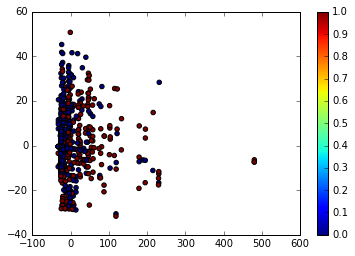

In [23]:
plt.scatter(proj[:, 0], proj[:, 1], c=target)
plt.colorbar()

In [24]:
pca =PCA(n_components=None)
X_pca= pca.fit_transform(train_feature.values)

In [25]:
X_pca.shape

(891L, 10L)

In [26]:
var_exp=pca.explained_variance_ratio_

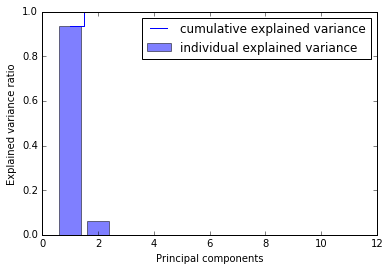

In [27]:
cum_var_exp = np.cumsum(var_exp)

plt.bar(range(1,11), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,11), cum_var_exp, where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

------------------------------------------------------------------------------------------

In [28]:
pca =PCA(n_components=2)
X_pca= pca.fit_transform(train_feature.values)

In [41]:
X_pca.shape

(891L, 2L)

In [66]:
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_pca,target,train_size=0.70,random_state=122)

---------------------------------

In [75]:
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import accuracy_score

----------------------------------------------

In [106]:
k_depth=range(1,12)
dt=DecisionTreeClassifier(random_state=36)
parameter_grid = {'max_depth':k_depth}
gs_dt= GridSearchCV(estimator=dt,
                param_grid=parameter_grid
                ,scoring='accuracy',
                cv=10,n_jobs=-1)

In [108]:
scores= cross_val_score(gs_dt,X_pca,target,scoring='accuracy',cv=10)
print('\nAverage Accuracy %.2f +/- %.2f' % (np.mean(scores), np.std(scores)))


Average Accuracy 0.68 +/- 0.04


In [109]:
scores= cross_val_score(gs_dt,train_feature.values,target,scoring='accuracy',cv=10)
print('\nAverage Accuracy %.2f +/- %.2f' % (np.mean(scores), np.std(scores)))


Average Accuracy 0.81 +/- 0.04


In [112]:

from sklearn.cross_validation import StratifiedKFold
from sklearn.metrics import accuracy_score
import numpy as np

params = []
scores = []

skfold = StratifiedKFold(y=target, n_folds=10, shuffle=False, random_state=1)
for train_idx, test_idx in skfold:
    gs_dt.fit(X_pca[train_idx], target[train_idx])
    y_pred = gs_dt.predict(X_pca[test_idx])
    acc = accuracy_score(y_true=target[test_idx], y_pred=y_pred)
    params.append(gs_dt.best_params_)
    scores.append(acc)

In [113]:
print('Decision tree models:')
for idx, m in enumerate(zip(params, scores)):
    print('%s. Acc: %.2f Params: %s' % (idx+1, m[1], m[0]))
print('\nAverage Accuracy %.2f +/- %.2f' % (np.mean(scores), np.std(scores)))

Decision tree models:
1. Acc: 0.62 Params: {'max_depth': 6}
2. Acc: 0.62 Params: {'max_depth': 6}
3. Acc: 0.71 Params: {'max_depth': 3}
4. Acc: 0.75 Params: {'max_depth': 3}
5. Acc: 0.69 Params: {'max_depth': 5}
6. Acc: 0.73 Params: {'max_depth': 4}
7. Acc: 0.70 Params: {'max_depth': 6}
8. Acc: 0.69 Params: {'max_depth': 3}
9. Acc: 0.63 Params: {'max_depth': 7}
10. Acc: 0.69 Params: {'max_depth': 4}

Average Accuracy 0.68 +/- 0.04


In [115]:
params = []
scores = []

skfold = StratifiedKFold(y=target, n_folds=10, shuffle=False, random_state=1)
for train_idx, test_idx in skfold:
    gs_dt.fit(train_feature.values[train_idx], target[train_idx])
    y_pred = gs_dt.predict(train_feature.values[test_idx])
    acc = accuracy_score(y_true=target[test_idx], y_pred=y_pred)
    params.append(gs_dt.best_params_)
    scores.append(acc)

In [116]:
print('Decision tree models:')
for idx, m in enumerate(zip(params, scores)):
    print('%s. Acc: %.2f Params: %s' % (idx+1, m[1], m[0]))
print('\nAverage Accuracy %.2f +/- %.2f' % (np.mean(scores), np.std(scores)))

Decision tree models:
1. Acc: 0.74 Params: {'max_depth': 6}
2. Acc: 0.81 Params: {'max_depth': 6}
3. Acc: 0.76 Params: {'max_depth': 6}
4. Acc: 0.84 Params: {'max_depth': 3}
5. Acc: 0.84 Params: {'max_depth': 3}
6. Acc: 0.78 Params: {'max_depth': 3}
7. Acc: 0.80 Params: {'max_depth': 4}
8. Acc: 0.79 Params: {'max_depth': 3}
9. Acc: 0.87 Params: {'max_depth': 6}
10. Acc: 0.85 Params: {'max_depth': 7}

Average Accuracy 0.81 +/- 0.04


------------------------------------------------

In [119]:
k_depth=range(1,12)
rf=RandomForestClassifier(random_state=36,n_estimators=100)
parameter_grid = {  'max_depth':k_depth}
gs_rf= GridSearchCV(estimator=rf,
                param_grid=parameter_grid
                ,scoring='accuracy',
                cv=10,n_jobs=-1)

In [120]:
scores= cross_val_score(gs_rf,X_pca,target,scoring='accuracy',cv=10)
print('\nAverage Accuracy %.2f +/- %.2f' % (np.mean(scores), np.std(scores)))


Average Accuracy 0.68 +/- 0.05


In [121]:
scores= cross_val_score(gs_rf,train_feature.values,target,scoring='accuracy',cv=10)
print('\nAverage Accuracy %.2f +/- %.2f' % (np.mean(scores), np.std(scores)))


Average Accuracy 0.83 +/- 0.04


In [123]:
params = []
scores = []

skfold = StratifiedKFold(y=target, n_folds=10, shuffle=False, random_state=1)
for train_idx, test_idx in skfold:
    gs_rf.fit(X_pca[train_idx], target[train_idx])
    y_pred = gs_rf.predict(X_pca[test_idx])
    acc = accuracy_score(y_true=target[test_idx], y_pred=y_pred)
    params.append(gs_rf.best_params_)
    scores.append(acc)

In [124]:
print('Random forest models:')
for idx, m in enumerate(zip(params, scores)):
    print('%s. Acc: %.2f Params: %s' % (idx+1, m[1], m[0]))
print('\nAverage Accuracy %.2f +/- %.2f' % (np.mean(scores), np.std(scores)))

Random forest models:
1. Acc: 0.58 Params: {'max_depth': 11}
2. Acc: 0.63 Params: {'max_depth': 8}
3. Acc: 0.64 Params: {'max_depth': 9}
4. Acc: 0.72 Params: {'max_depth': 8}
5. Acc: 0.71 Params: {'max_depth': 6}
6. Acc: 0.73 Params: {'max_depth': 7}
7. Acc: 0.73 Params: {'max_depth': 6}
8. Acc: 0.70 Params: {'max_depth': 6}
9. Acc: 0.67 Params: {'max_depth': 6}
10. Acc: 0.73 Params: {'max_depth': 7}

Average Accuracy 0.68 +/- 0.05


In [125]:
params = []
scores = []

skfold = StratifiedKFold(y=target, n_folds=10, shuffle=False, random_state=1)
for train_idx, test_idx in skfold:
    gs_rf.fit(train_feature.values[train_idx], target[train_idx])
    y_pred = gs_rf.predict(train_feature.values[test_idx])
    acc = accuracy_score(y_true=target[test_idx], y_pred=y_pred)
    params.append(gs_rf.best_params_)
    scores.append(acc)

In [126]:
print('Random forest models:')
for idx, m in enumerate(zip(params, scores)):
    print('%s. Acc: %.2f Params: %s' % (idx+1, m[1], m[0]))
print('\nAverage Accuracy %.2f +/- %.2f' % (np.mean(scores), np.std(scores)))

Random forest models:
1. Acc: 0.80 Params: {'max_depth': 6}
2. Acc: 0.81 Params: {'max_depth': 8}
3. Acc: 0.76 Params: {'max_depth': 9}
4. Acc: 0.88 Params: {'max_depth': 9}
5. Acc: 0.91 Params: {'max_depth': 10}
6. Acc: 0.81 Params: {'max_depth': 6}
7. Acc: 0.83 Params: {'max_depth': 9}
8. Acc: 0.80 Params: {'max_depth': 9}
9. Acc: 0.88 Params: {'max_depth': 9}
10. Acc: 0.84 Params: {'max_depth': 9}

Average Accuracy 0.83 +/- 0.04


---------------------------------------

In [145]:
gb=GradientBoostingClassifier(random_state=36)
parameter_grid = { 'n_estimators':[100,1000,10000] }
gs_gb= GridSearchCV(estimator=gb,
                param_grid=parameter_grid
                ,scoring='accuracy',
                cv=10,n_jobs=-1)

In [146]:
scores= cross_val_score(gs_gb,X_pca,target,scoring='accuracy',cv=10)
print('\nAverage Accuracy %.2f +/- %.2f' % (np.mean(scores), np.std(scores)))


Average Accuracy 0.69 +/- 0.04


In [147]:
scores= cross_val_score(gs_gb,train_feature.values,target,scoring='accuracy',cv=10)
print('\nAverage Accuracy %.2f +/- %.2f' % (np.mean(scores), np.std(scores)))


Average Accuracy 0.83 +/- 0.04


In [149]:
params = []
scores = []

skfold = StratifiedKFold(y=target, n_folds=10, shuffle=False, random_state=1)
for train_idx, test_idx in skfold:
    gs_gb.fit(train_feature.values[train_idx], target[train_idx])
    y_pred = gs_gb.predict(train_feature.values[test_idx])
    acc = accuracy_score(y_true=target[test_idx], y_pred=y_pred)
    params.append(gs_gb.best_params_)
    scores.append(acc)

In [150]:
print('Gradient boosting models:')
for idx, m in enumerate(zip(params, scores)):
    print('%s. Acc: %.2f Params: %s' % (idx+1, m[1], m[0]))
print('\nAverage Accuracy %.2f +/- %.2f' % (np.mean(scores), np.std(scores)))

Gradient boosting models:
1. Acc: 0.81 Params: {'n_estimators': 100}
2. Acc: 0.82 Params: {'n_estimators': 100}
3. Acc: 0.72 Params: {'n_estimators': 1000}
4. Acc: 0.87 Params: {'n_estimators': 100}
5. Acc: 0.88 Params: {'n_estimators': 100}
6. Acc: 0.85 Params: {'n_estimators': 100}
7. Acc: 0.85 Params: {'n_estimators': 100}
8. Acc: 0.79 Params: {'n_estimators': 100}
9. Acc: 0.84 Params: {'n_estimators': 100}
10. Acc: 0.85 Params: {'n_estimators': 100}

Average Accuracy 0.83 +/- 0.04


---------------------------------------------

In [152]:
gs_rf.fit(train_feature.values,target)
print('Best parameters %s' % gs_rf.best_params_)

Best parameters {'max_depth': 8}


In [153]:
gs_gb.fit(train_feature.values,target)
print('Best parameters %s' % gs_gb.best_params_)

Best parameters {'n_estimators': 100}


In [163]:
clf_rf = gs_rf.best_estimator_
gs_rf_pred=clf_rf.predict(test_feature.values)

In [164]:
clf_gb = gs_gb.best_estimator_
gs_gb_pred=clf_gb.predict(test_feature.values)

In [166]:
submission = pd.DataFrame({
        "PassengerId":data_test["PassengerId"],
        "Survived": gs_rf_pred
    })
submission.to_csv("final3_gs_rf_pred.csv", index=False)

In [168]:
submission = pd.DataFrame({
        "PassengerId":data_test["PassengerId"],
        "Survived": gs_gb_pred
    })
submission.to_csv("final3_gs_gb_pred.csv", index=False)

-----------------------------

In [177]:
rfc=RandomForestClassifier(random_state=36,n_estimators=100,max_depth=9)
rfc.fit(train_feature.values,target)
rfc_pred=rfc.predict(test_feature.values)

In [179]:
submission = pd.DataFrame({
        "PassengerId":data_test["PassengerId"],
        "Survived": rfc_pred
    })
submission.to_csv("final3_rfc_pred.csv", index=False)